# Bayesian modeling
1. Generate fake data to model the process 
$$f(t)=\sum_{i=1}^m A_ie^{-\lambda_i t}$$
$$Y_i=f(t_i)+\sigma\xi_i$$
$$\frac{1}{\sigma}(Y_i-f(t_i))\sim\mathcal{N}(0,1)$$
We will set $m=3$, $A=[1, 4, 9]$, $\lambda=[1, 1/4, 1/9]$, $\sigma=2$

2. The likelihood function is then
$$\begin{aligned}
\mathcal{L}((t,Y)_{i=1:\tau} |\ A,\lambda,\sigma)&\propto\prod_{i=1}^{N}\exp\bigg[-\frac{1}{2}\bigg(\frac{Y_i-f(t_i)}{\sigma}\bigg)^2\bigg]\\
&\propto\exp\bigg[-\frac{1}{2}\sum_{i=1}^{N}\bigg(\frac{Y_i-f(t_i)}{\sigma}\bigg)^2\bigg]
\end{aligned}$$

In [50]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
%matplotlib inline

rn.seed(132415874)

m = 3
A = np.array([float(i) ** 2 for i in range(1, m+1)])
l = np.array([1/(float(i) ** 2) for i in range(1, m+1)])
sigma = 2

def generator(min_t, max_t, n = 100):
    def f(t):
        def _f(t): 
            return sum(np.multiply(A, np.exp(-1.0 * l * t))) + sigma * rn.normal()
        return np.vectorize(_f)(t) 
    return f(np.linspace(min_t, max_t, n)) 

## Generating data

([<matplotlib.lines.Line2D at 0x28ed9f850f0>],
 <matplotlib.text.Text at 0x28ed9f60748>)

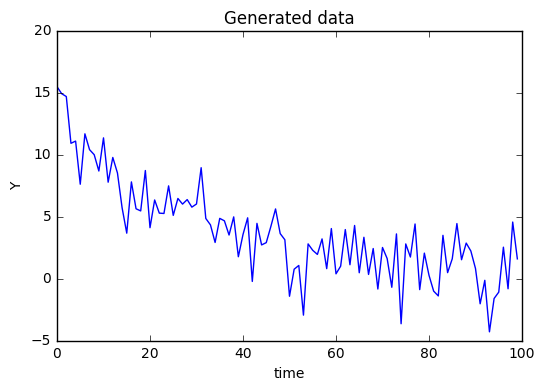

In [54]:
data = generator(0, 25)
plt.plot(data), plt.xlabel('time'), plt.ylabel('Y'), plt.title('Generated data')

## Define the priors, and the Bayesian inference process
To make it generic, we'll use classes and create object that inherit the interface for easier implementation. These are implemented in a separate file

NotImplementedError: Inherit this interface!